In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from main import GradCAM
from functools import partial
import matplotlib.pyplot as plt
import numpy as np

C:\Users\dslisleedh\anaconda3\envs\tfonly\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = tfds.load('cycle_gan/horse2zebra', with_info=False, as_supervised=True)

In [3]:
train_horses, train_zebras = dataset['trainA'], dataset['trainB']
valid_horses, valid_zebras = dataset['testA'], dataset['testB']

In [4]:
def horse_preprocessing(x, y, label=0):
    x = tf.cast(x, tf.float32) / 255.
    return x, tf.convert_to_tensor(label, tf.float32)

zebra_preprocessing = partial(horse_preprocessing, label=1)

train_horses = train_horses.map(horse_preprocessing)
valid_horses = valid_horses.map(horse_preprocessing)
train_zebras = train_zebras.map(zebra_preprocessing)
valid_zebras = valid_zebras.map(zebra_preprocessing)

train_dataset = train_horses.concatenate(train_zebras).shuffle(buffer_size=1000).batch(256, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_horses.concatenate(valid_zebras).shuffle(buffer_size=1000).batch(256, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [5]:
def return_model():
    xception = tf.keras.applications.xception.Xception(include_top=False,weights='imagenet',
                                                       input_shape=(256, 256, 3)
                                                      )
    xception.trainable = False
    featuremap = tf.keras.layers.GlobalAveragePooling2D()(xception.output)
    featuremap = tf.keras.layers.Dropout(.2)(featuremap)
    output = tf.keras.layers.Dense(2,
                                   activation='softmax',
                                   kernel_initializer=tf.keras.initializers.zeros()
                                   )(featuremap)
    model = tf.keras.Model(xception.input, output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(.0002), loss='sparse_categorical_crossentropy', metrics=['accuracy']
    )
    return model

In [6]:
model = return_model()

In [7]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
]
model.fit(
    train_dataset, validation_data=valid_dataset, epochs=30, callbacks=callbacks
)

Epoch 1/30
9/9 [==============================] - 12s 918ms/step - loss: 0.6655 - accuracy: 0.5699 - val_loss: 0.5470 - val_accuracy: 0.9570
Epoch 2/30
9/9 [==============================] - 8s 845ms/step - loss: 0.4842 - accuracy: 0.9657 - val_loss: 0.4087 - val_accuracy: 0.9805
Epoch 3/30
9/9 [==============================] - 8s 833ms/step - loss: 0.3614 - accuracy: 0.9839 - val_loss: 0.3100 - val_accuracy: 0.9844
Epoch 4/30
9/9 [==============================] - 8s 825ms/step - loss: 0.2804 - accuracy: 0.9861 - val_loss: 0.2410 - val_accuracy: 0.9844
Epoch 5/30
9/9 [==============================] - 8s 840ms/step - loss: 0.2245 - accuracy: 0.9878 - val_loss: 0.1960 - val_accuracy: 0.9844
Epoch 6/30
9/9 [==============================] - 8s 846ms/step - loss: 0.1848 - accuracy: 0.9883 - val_loss: 0.1638 - val_accuracy: 0.9844


In [8]:
cam = GradCAM(model)

Text(0.5, 0.98, 'pred: 0')

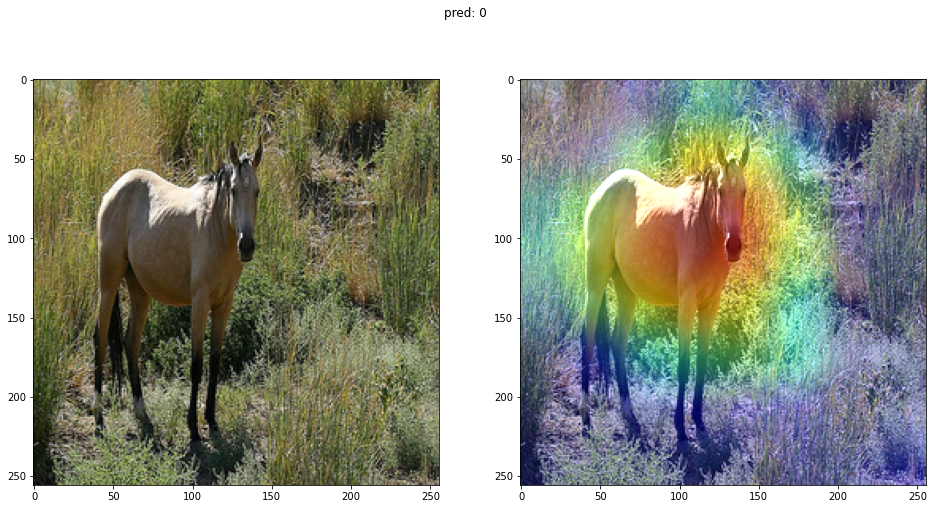

In [19]:
for sample in valid_dataset:
    break
sample = sample[0][0]
gradcam, preds = cam(sample)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(sample)
ax[1].imshow(gradcam[0])
plt.suptitle(f'pred: {tf.argmax(preds, axis=-1)[0]}')

Text(0.5, 0.98, 'pred: 1')

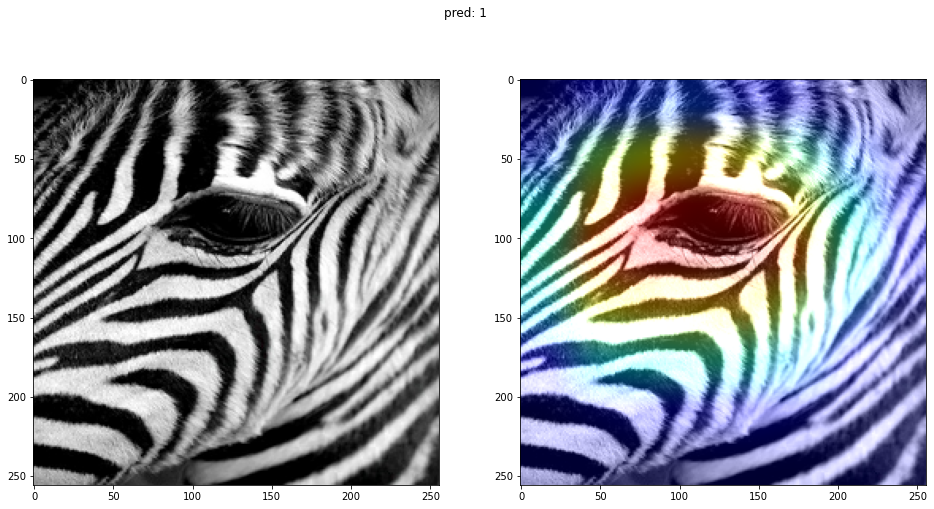

In [20]:
for sample in valid_dataset:
    break
sample = sample[0][0]
gradcam, preds = cam(sample)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(sample)
ax[1].imshow(gradcam[0])
plt.suptitle(f'pred: {tf.argmax(preds, axis=-1)[0]}')

Text(0.5, 0.98, 'pred: 1')

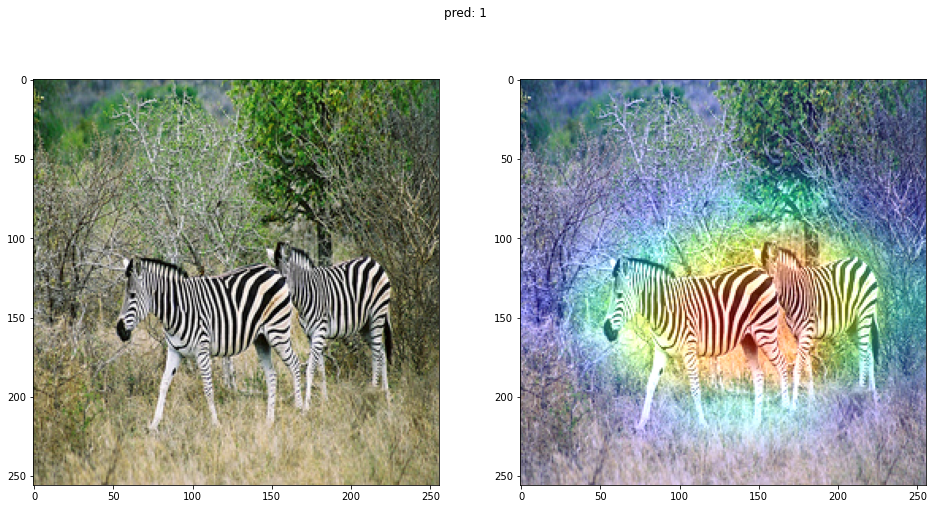

In [21]:
for sample in valid_dataset:
    break
sample = sample[0][0]
gradcam, preds = cam(sample)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(sample)
ax[1].imshow(gradcam[0])
plt.suptitle(f'pred: {tf.argmax(preds, axis=-1)[0]}')